In [1]:
# f(x) = 500 -20x1 - 26x2 -4x1x2 + 4x1^2 + 3x2^2

In [203]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [204]:
c = 0.8
iterations = 2

In [205]:
# Define the shape of the array
rows, cols = 2, 4

# Create a 2D array with custom ranges
temp = np.zeros((rows, cols))

# Initialize each row with the specified range
temp[0, :] = np.random.uniform(-2, 10, cols)  # First row: -2 < x < 10
temp[1, :] = np.random.uniform(-1, 11, cols)  # Second row: -1 < y < 11

In [206]:
print(temp)

[[2.48803623 8.59600349 3.54754555 4.5518352 ]
 [1.77780499 6.21392926 4.83243573 3.59350889]]


Initial temp:  427.80793821292946
Global best temp:  313.22163964190435


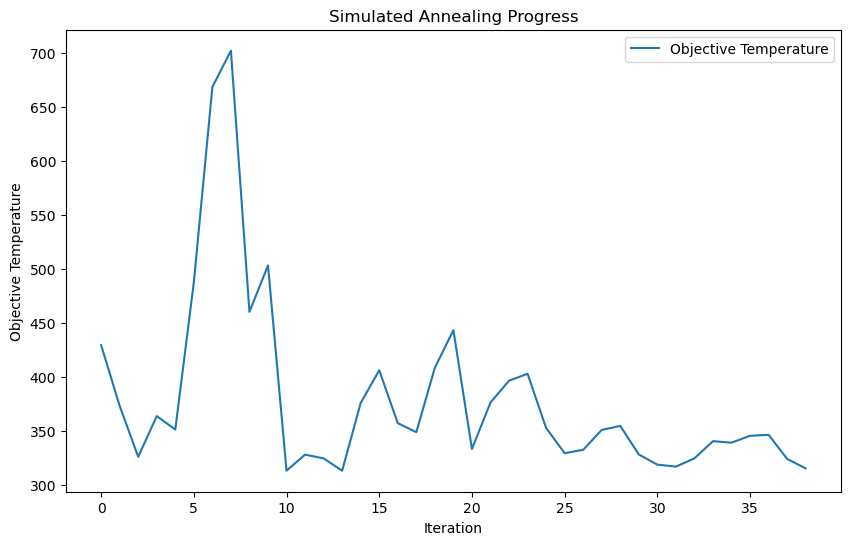

In [211]:
temperatures, start_temp = sa(cols, iterations = 100)
print("Initial temp: ", start_temp)
print("Global best temp: ",min(global_minimum_temp))
plt.figure(figsize=(10, 6))
plt.plot(temperatures, label="Objective Temperature")
plt.xlabel("Iteration")
plt.ylabel("Objective Temperature")
plt.title("Simulated Annealing Progress")
plt.legend()
plt.show()

In [196]:
def sa(cols, iterations):
    global_best = []
    
    # Extract the rows x1 and x2 from the temp array
    x1 = list(temp[0, :])
    x2 = list(temp[1, :])
    init_temp = initial_fitness_function(x1, x2)
    start_temp = sum(init_temp) / cols
    # print("Initial temp points: ", init_temp)
    # print("Start temp: ", start_temp)
    # Cooling factor
    c = 0.8
    dp = objective_fun(10, 11)
    objective_temp = fitness_function(dp)
    hot = objective_temp
    for _ in range(iterations):
        # print(dp)
        # dp = objective_fun(dp[0], dp[1])
        # objective_temp = fitness_function(dp)
        u1 = random_numbers()
        u2 = random_numbers()
        variants, k = new_varitions(dp, accuracy=6.0)
        points = new_points(u1, u2, variants, k)
        new_temp = fitness_function(points)
        # print("Objective temp: ", objective_temp)
        # print("New temp: ", new_temp)
        temp_difference = new_temp - objective_temp
        # print("Temp Difference: ", temp_difference)
        if temp_difference > 0:
            # Apply Metropolis criterion for accepting worse solutions
            if metropolis(temp_difference, start_temp) == 1:
                global_best.append(new_temp)
                objective_temp = new_temp
                dp = points
        else :

            # Apply temperature cooling
            dp = points
            # print(".................")
            start_temp *= c
            global_best.append(new_temp)
            objective_temp = new_temp

    # Return the final best solution found
    return global_best, hot


In [144]:
def metropolis(temp_difference, start_temp):
    r = random_numbers()
    delta = 2.718
    K = 1
    power = (temp_difference/start_temp)* (-1)
    value = delta**power
    if value > r:
        # print("Metropolis successed")
        return 1
    # print("Metropolis failed")
    return 0


In [153]:
def new_points(u1, u2, variants, dp):
    points = []
    points.append(dp[0] + u1*(variants[0]))
    points.append(dp[1] + u2*(variants[1]))
    return points

In [189]:
def new_varitions(dp, accuracy):
    variants = []
    k = []
    for value in dp:
        # print(value)
        r1 = value - accuracy
        k.append(r1)
        r2 = value + accuracy
        variants.append(r2 - r1)

    return variants, k

In [54]:
def initial_fitness_function(x1, x2):
    fitness = []
    
    # Loop while both x1 and x2 have elements
    while x1 and x2:
        x = x1.pop()
        y = x2.pop()
        fitness.append(500 - 20*x - 26*y - 4*x*y + 4*(x**2) + 3*(y**2))
    
    return fitness

In [78]:
def fitness_function(dp):
    
    fitness = 500 - 20*dp[0] - 26*dp[1] - 4*dp[0]*dp[1] + 4*(dp[0]**2) + 3*(dp[1]**2)
    return fitness

In [8]:
def random_numbers():
    random_num = random.uniform(0, 1)
    return random_num

In [123]:
def objective_fun(x, y):
    my_list = []
    my_list.append(random.uniform(-2, x))  # Add a random float between -2 and 10
    my_list.append(random.uniform(-1, y))  # Add a random float between -1 and 11
    return my_list